<a href="https://colab.research.google.com/github/oxBinaryBrain/Sentiment-Analysis-of-IMDB-Movie-Reviews/blob/main/GenAI_senitment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sentiment Analysis


Version 1


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Load the Dataset
file_path = '/content/IMDB Dataset.csv'  # Update this with your actual file name
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Step 2: Data Preprocessing
# Check for missing values
print(data.isnull().sum())

# Drop missing values if any
data.dropna(inplace=True)

# Step 3: Text Vectorization
X = data['review']  # Features (text reviews)
y = data['sentiment']  # Labels (positive/negative)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use TF-IDF Vectorizer to convert text to numerical format
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Step 4: Model Selection
model = MultinomialNB()  # Using Naive Bayes for classification

# Step 5: Model Training
model.fit(X_train_tfidf, y_train)

# Step 6: Model Evaluation
y_pred = model.predict(X_test_tfidf)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Step 7: Prediction (Example)
new_reviews = ["This movie was fantastic!", "I did not like this film at all."]
new_reviews_tfidf = vectorizer.transform(new_reviews)
predictions = model.predict(new_reviews_tfidf)

for review, sentiment in zip(new_reviews, predictions):
    print(f"Review: {review} | Sentiment: {sentiment}")

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
review       0
sentiment    0
dtype: int64
Accuracy: 0.8652
              precision    recall  f1-score   support

    negative       0.86      0.88      0.87      4961
    positive       0.88      0.85      0.86      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

Review: This movie was fantastic! | Sentiment: positive
Review: I did not like this film at all. | Sentiment: negative


Version 2


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
review       0
sentiment    0
dtype: int64


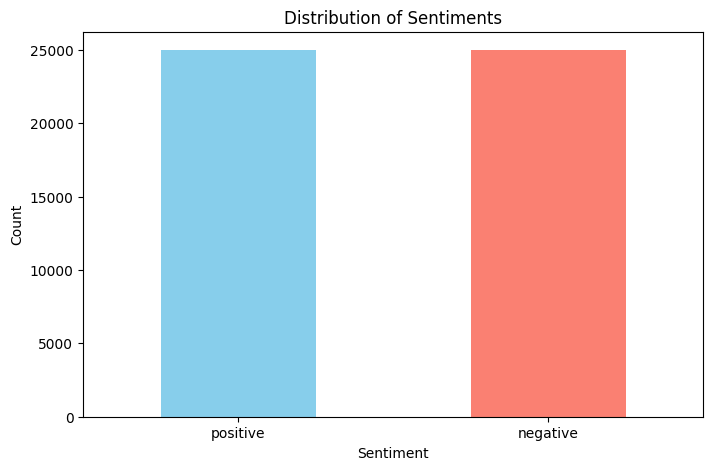

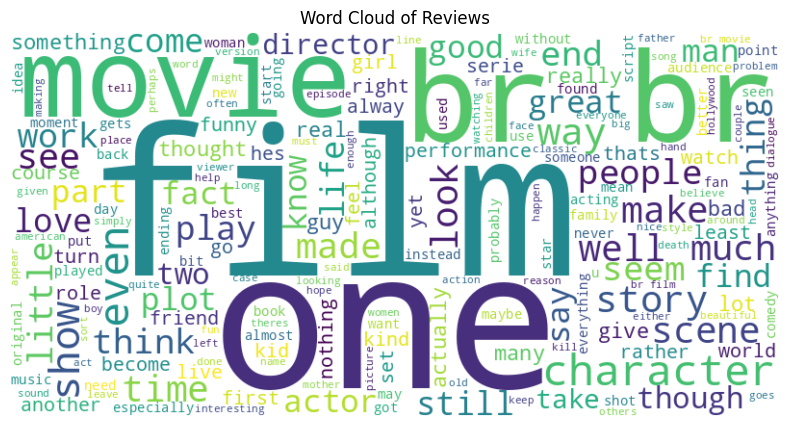

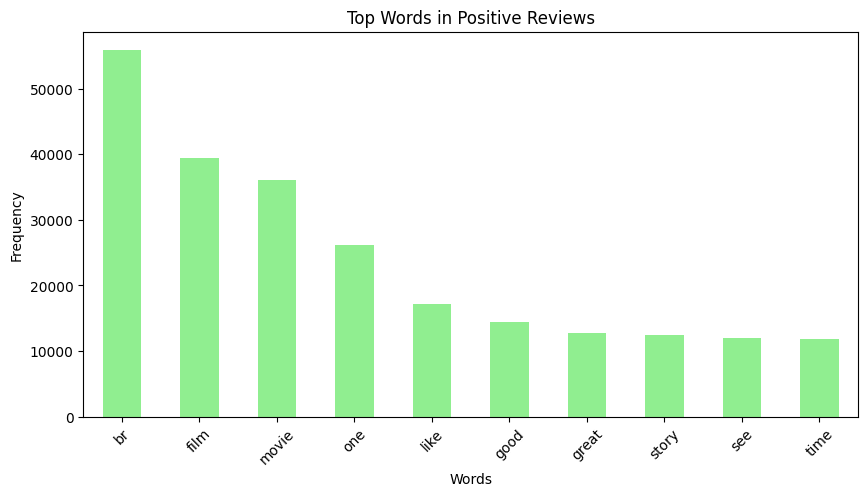

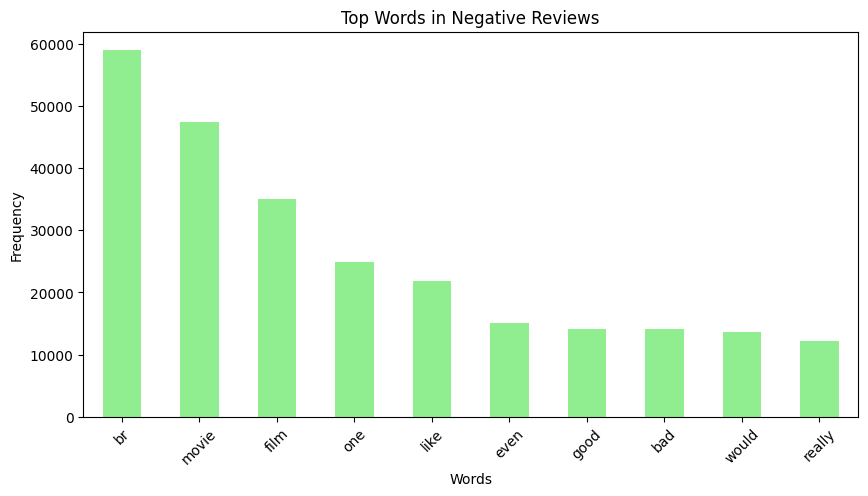

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords if you haven't already
nltk.download('stopwords')

# Step 1: Load the Dataset
file_path = '/content/IMDB Dataset.csv'  # Update this with your actual file name
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Step 2: Data Preprocessing
# Check for missing values
print(data.isnull().sum())

# Drop missing values if any
data.dropna(inplace=True)

# Text cleaning function
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation and numbers
    text = text.lower()  # Convert to lowercase
    return text

# Apply text cleaning
data['cleaned_review'] = data['review'].apply(clean_text)

# Remove stop words
stop_words = set(stopwords.words('english'))
data['cleaned_review'] = data['cleaned_review'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Step 3: Visualizations
# Distribution of sentiments
plt.figure(figsize=(8, 5))
data['sentiment'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Word Cloud for all reviews
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data['cleaned_review']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

# Top N words in positive and negative reviews
positive_reviews = data[data['sentiment'] == 'positive']['cleaned_review']
negative_reviews = data[data['sentiment'] == 'negative']['cleaned_review']

# Function to plot top N words
def plot_top_n_words(reviews, title, n=10):
    all_words = ' '.join(reviews)
    all_words = ' '.join(all_words.split())
    word_freq = pd.Series(all_words.split()).value_counts()[:n]

    plt.figure(figsize=(10, 5))
    word_freq.plot(kind='bar', color='lightgreen')
    plt.title(title)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

# Plot top words in positive reviews
plot_top_n_words(positive_reviews, 'Top Words in Positive Reviews')

# Plot top words in negative reviews
plot_top_n_words(negative_reviews, 'Top Words in Negative Reviews')

# Step 4: Text Vectorization
X = data['cleaned_review']  # Features (cleaned text reviews)
y = data['sentiment']  # Labels (positive/negative)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use TF-IDF Vectorizer to convert text to numerical format
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Step 5: Model Selection
model = MultinomialNB()  # Using Naive Bayes

Version 3


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
review       0
sentiment    0
dtype: int64


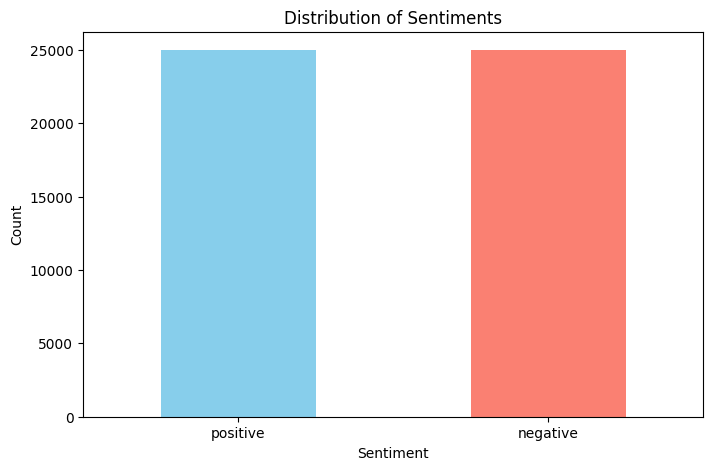

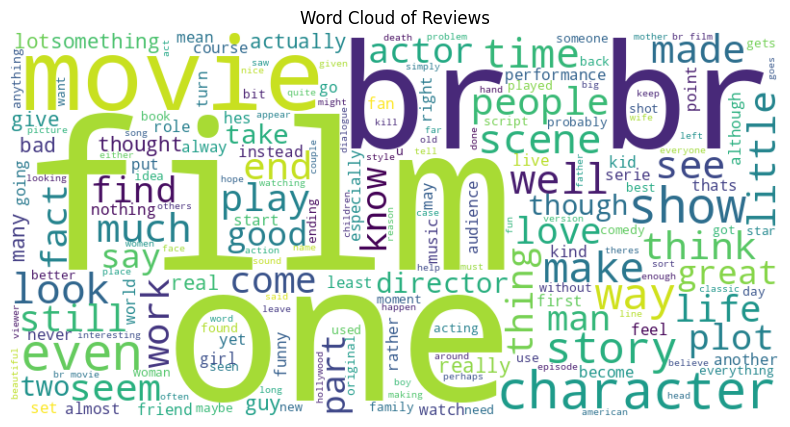

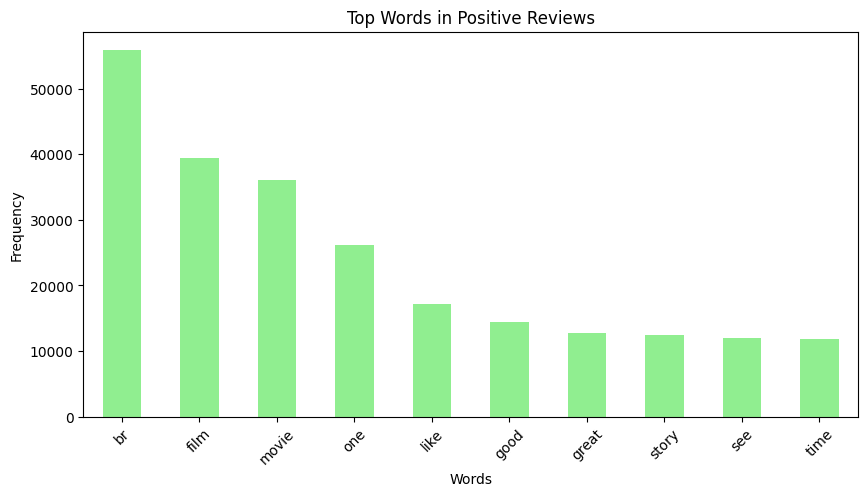

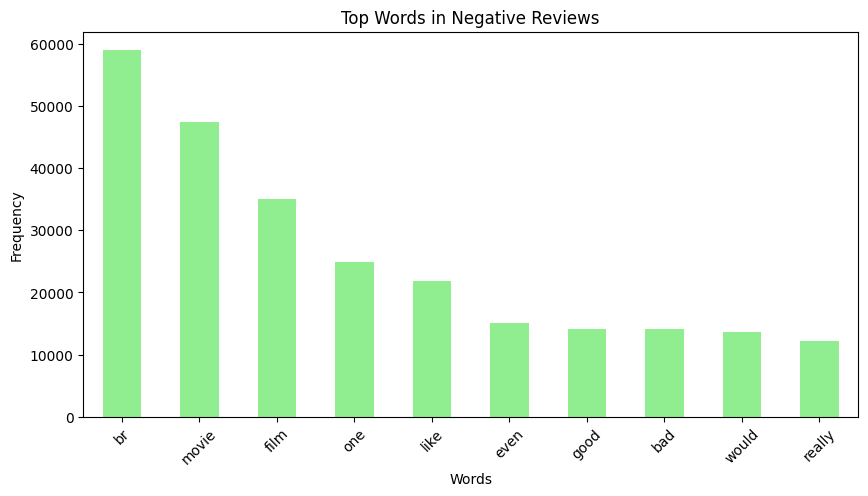

Best Hyperparameters: {'alpha': 1.0}


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords if you haven't already
nltk.download('stopwords')

# Step 1: Load the Dataset
file_path = '/content/IMDB Dataset.csv'  # Update this with your actual file name
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Step 2: Data Preprocessing
# Check for missing values
print(data.isnull().sum())

# Drop missing values if any
data.dropna(inplace=True)

# Text cleaning function
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation and numbers
    text = text.lower()  # Convert to lowercase
    return text

# Apply text cleaning
data['cleaned_review'] = data['review'].apply(clean_text)

# Remove stop words
stop_words = set(stopwords.words('english'))
data['cleaned_review'] = data['cleaned_review'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Step 3: Visualizations
# Distribution of sentiments
plt.figure(figsize=(8, 5))
data['sentiment'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Word Cloud for all reviews
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data['cleaned_review']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

# Top N words in positive and negative reviews
positive_reviews = data[data['sentiment'] == 'positive']['cleaned_review']
negative_reviews = data[data['sentiment'] == 'negative']['cleaned_review']

# Function to plot top N words
def plot_top_n_words(reviews, title, n=10):
    all_words = ' '.join(reviews)
    all_words = ' '.join(all_words.split())
    word_freq = pd.Series(all_words.split()).value_counts()[:n]

    plt.figure(figsize=(10, 5))
    word_freq.plot(kind='bar', color='lightgreen')
    plt.title(title)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

# Plot top words in positive reviews
plot_top_n_words(positive_reviews, 'Top Words in Positive Reviews')

# Plot top words in negative reviews
plot_top_n_words(negative_reviews, 'Top Words in Negative Reviews')

# Step 4: Text Vectorization
X = data['cleaned_review']  # Features (cleaned text reviews)
y = data['sentiment']  # Labels (positive/negative)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use TF-IDF Vectorizer to convert text to numerical format
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Step 5: Model Selection and Training
model = MultinomialNB()  # Using Naive Bayes

# Hyperparameter tuning using Grid Search
param_grid = {'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]}  # Example hyperparameter
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_tfidf, y_train)

# Best model from Grid Search
best_model = grid_search.best_estimator_
print(f'Best Hyperparameters: {grid_search.best_params_}')

# Step 6: Evaluation
y_pred = best_model.predict(X_test_tfidf)

Synthetic Financial Data Generation

Class
0.0    10000
1.0     1000
Name: count, dtype: int64
Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      3004
         1.0       0.87      0.78      0.82       296

    accuracy                           0.97      3300
   macro avg       0.92      0.88      0.90      3300
weighted avg       0.97      0.97      0.97      3300

Confusion Matrix:
 [[2969   35]
 [  65  231]]
ROC AUC Score: 0.94


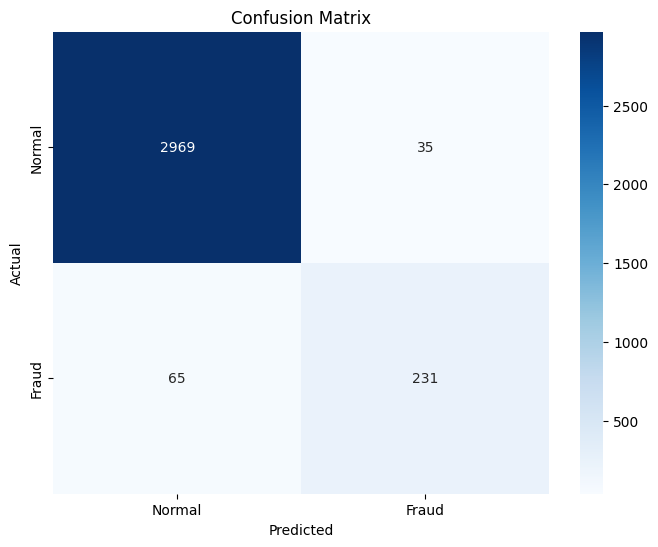

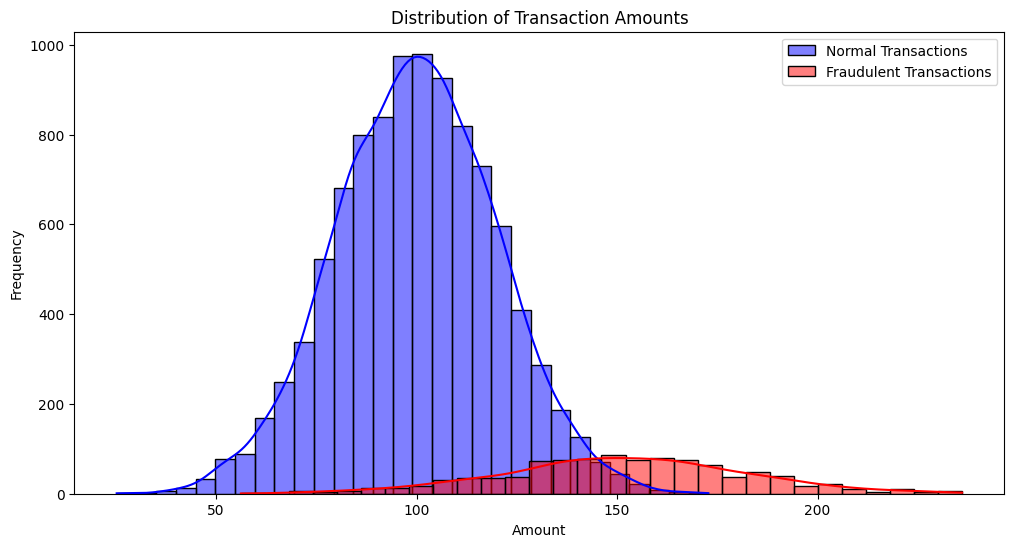

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Step 1: Data Generation
def generate_synthetic_data(num_samples=1000):
    # Generate normal transactions
    normal_data = np.random.normal(loc=100, scale=20, size=(num_samples, 2))  # Amount, Feature1
    normal_labels = np.zeros(num_samples)  # Label 0 for normal transactions

    # Generate fraudulent transactions
    fraud_data = np.random.normal(loc=150, scale=30, size=(num_samples // 10, 2))  # Higher amount, Feature1
    fraud_labels = np.ones(fraud_data.shape[0])  # Label 1 for fraudulent transactions

    # Combine the datasets
    data = np.vstack((normal_data, fraud_data))
    labels = np.concatenate((normal_labels, fraud_labels))

    # Create a DataFrame
    df = pd.DataFrame(data, columns=['Amount', 'Feature1'])
    df['Class'] = labels
    return df

# Generate synthetic data
df = generate_synthetic_data(10000)

# Step 2: Data Preprocessing
# Check for class imbalance
print(df['Class'].value_counts())

# Step 3: Model Training
X = df[['Amount', 'Feature1']]
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 4: Evaluation
# Obtain predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Print classification report and confusion matrix
print('Classification Report:\n', classification_report(y_test, y_pred))
conf_mat = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_mat)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC Score: {roc_auc:.2f}')

# Step 5: Statistical Visualization
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Visualize the distribution of transactions
plt.figure(figsize=(12, 6))
sns.histplot(df[df['Class'] == 0]['Amount'], bins=30, color='blue', label='Normal Transactions', kde=True)
sns.histplot(df[df['Class'] == 1]['Amount'], bins=30, color='red', label='Fraudulent Transactions', kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Version 2

In [ ]:
import pandas as pd
import numpy as np
import random

def generate_transaction_data(num_rows, fraud_rate=0.1):
    """
    Generate synthetic transaction data for fraud detection.

    Parameters:
    - num_rows: int, number of transaction records to generate
    - fraud_rate: float, probability of a transaction being fraudulent (between 0 and 1)

    Returns:
    - DataFrame containing the generated transaction data
    """

    # Validate inputs
    if num_rows <= 0:
        raise ValueError("Number of rows must be a positive integer.")
    if not (0 <= fraud_rate <= 1):
        raise ValueError("Fraud rate must be between 0 and 1.")

    transaction_types = ['CASH_OUT', 'PAYMENT', 'TRANSFER', 'DEBIT', 'CASH_IN']

    data = []

    for _ in range(num_rows):
        step = random.randint(1, 30)
        t_type = random.choice(transaction_types)
        amount = round(random.uniform(0.01, 100000.00), 2)
        name_orig = f"C{random.randint(1000000000, 9999999999)}"
        old_balance_orig = round(random.uniform(0.00, 100000.00), 2)
        new_balance_orig = max(0, old_balance_orig - amount)
        name_dest = f"C{random.randint(1000000000, 9999999999)}" if t_type in ['TRANSFER', 'CASH_OUT'] else f"M{random.randint(1000000000, 9999999999)}"
        old_balance_dest = round(random.uniform(0.00, 100000.00), 2)
        new_balance_dest = old_balance_dest + amount if t_type == 'TRANSFER' else old_balance_dest
        is_fraud = 1 if t_type in ['TRANSFER', 'CASH_OUT'] and random.random() < fraud_rate else 0
        is_flagged_fraud = 1 if is_fraud and amount > 200000 else 0

        transaction_time = random.choice(['Morning', 'Afternoon', 'Evening', 'Night'])
        transaction_location = random.choice(['US', 'EU', 'Asia', 'Africa'])
        noise_feature = random.uniform(0, 1)

        # Append transaction data as a dictionary
        transaction = {
            'step': step,
            'type': t_type,
            'amount': amount,
            'nameOrig': name_orig,
            'oldbalanceOrg': old_balance_orig,
            'newbalanceOrig': new_balance_orig,
            'nameDest': name_dest,
            'oldbalanceDest': old_balance_dest,
            'newbalanceDest': new_balance_dest,
            'isFraud': is_fraud,
            'isFlaggedFraud': is_flagged_fraud,
            'transaction_time': transaction_time,
            'transaction_location': transaction_location,
            'noise_feature': noise_feature
        }
        data.append(transaction)

    df = pd.DataFrame(data)
    return df

# User input
num_rows = int(input("Enter the number of rows to generate: "))
fraud_rate = float(input("Enter the fraud rate (e.g., 0.1 for 1%): "))

# Generate the dataset
fraud_dataset = generate_transaction_data(num_rows, fraud_rate)

# Save to CSV
file_name = "synthetic_fraud_dataset_with_noise.csv"
fraud_dataset.to_csv(file_name, index=False)

# Summary of the generated dataset
total_frauds = fraud_dataset['isFraud'].sum()
print(f"Dataset generated and saved as {file_name}")
print(f"Total transactions: {num_rows}")
print(f"Total fraudulent transactions: {total_frauds} ({(total_frauds / num_rows) * 100:.2f}%)")

Enter the number of rows to generate: 25000
Enter the fraud rate (e.g., 0.1 for 1%): .2
Dataset generated and saved as synthetic_fraud_dataset_with_noise.csv
Total transactions: 25000
Total fraudulent transactions: 2025 (8.10%)


In [ ]:
## In the provided code, a transaction is classified as fraudulent based on the following parameters:

## Transaction Type: The transaction type must be either TRANSFER or CASH_OUT. These types are typically associated with higher risks of fraud in financial transactions.

## Random Probability: A random number is generated, and if this number is less than the specified fraud_rate, the transaction is classified as fraudulent. This means that the likelihood of a transaction being fraudulent is determined by the fraud_rate parameter, which is a decimal value representing the probability of fraud (e.g., 0.1 for 10%).

## Code Snippet for Fraud Determination
## Here’s the relevant part of the code that determines whether a transaction is fraudulent:



is_fraud = 1 if t_type in ['TRANSFER', 'CASH_OUT'] and random.random() < fraud_rate else 0


##Explanation:
## t_type in ['TRANSFER', 'CASH_OUT']: This checks if the transaction type is either TRANSFER or CASH_OUT. If it is, the transaction is considered for potential fraud.

## random.random() < fraud_rate: This generates a random float between 0.0 and 1.0. If this random number is less than the fraud_rate, the transaction is classified as fraudulent. For example, if the fraud_rate is set to 0.1 (10%), there is a 10% chance that a transaction of type TRANSFER or CASH_OUT will be marked as fraudulent.

## In summary, a transaction is declared fraudulent if:

## It is of type TRANSFER or CASH_OUT.
## A randomly generated number falls below the specified fraud rate.
## This approach allows for a controlled simulation of fraud in the generated dataset, where the fraud rate can be adjusted to create different scenarios for testing and analysis.